In [1]:
#Apoorva Ambulgekar 60004180007 AIML A1 TE Comps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [6]:
y=df[list(df.columns)[-1]]
x=df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [7]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [8]:
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(df.iloc[:,0:4],df['Name'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
y_pred=neigh.predict(x_test)

In [11]:
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import operator

In [13]:
df=pd.read_csv('Iris.csv')

In [14]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
def euclideandistance(data1,data2,length):
    distance=0
    for x in range(length):
        distance+=np.square(data1[x]-data2[x])
    return np.sqrt(distance)

In [16]:
def knn(trainSet,testInstance,k):
    distances={}
    sort=[]
    length=testInstance.shape[1]
    for x in range(len(trainSet)):
        dist=euclideandistance(testInstance,trainSet.iloc[x],length)
        distances[x]=dist[0]
    sorted_d = sorted(distances.items(),key=operator.itemgetter(1))
    neighbors=[]
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes={}
    for x in range(len(neighbors)):
        response=trainSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] !=1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(),key=operator.itemgetter(1),reverse=True)
    return (sortedVotes[0][0],neighbors)

In [17]:
testSet=[[7.2,3.6,5.1,2.5]]
test=pd.DataFrame(testSet)
test.shape[1]
k=1
result,neigh=knn(df,test,k)
print(result)
print(neigh)

Iris-virginica
[141]


In [18]:
k=3
result,neigh=knn(df,test,k)
print(result)
print(neigh)

Iris-virginica
[141, 139, 120]


In [19]:
k=5
result,neigh=knn(df,test,k)
print(result)
print(neigh)

Iris-virginica
[141, 139, 120, 145, 144]


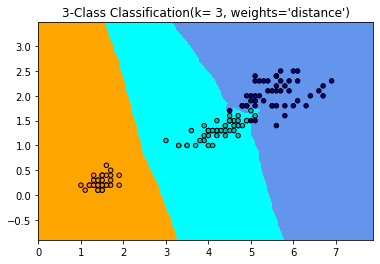

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import  neighbors,datasets
n_neighbors=3
iris=datasets.load_iris()
x=iris.data[:,2:4]
y=iris.target
h=.02
cmap_light=ListedColormap(['orange','cyan','cornflowerblue'])
cmap_bold=ListedColormap(['darkorange','c','darkblue'])
for weights in ['uniform','distance']:
    clf=neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
clf.fit(x,y)
x_min,x_max=x[:,0].min() - 1, x[:,0].max() + 1
y_min,y_max=x[:,1].min() - 1, x[:,1].max() + 1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("3-Class Classification(k= %i, weights='%s')"%(n_neighbors,weights))
plt.show()